# Week 5 - More Modules

Before we get back to writing our own functions, I wanted to have us spend more time with some resources that have already been created for us. This will give us a chance to explore Python a bit more and get exposed to some of the structures we will use next.

Again, a major part of the course design is also to show you how these tools are used to answer questions in your other courses. To wit: Calculus!

We aren't going to have time to use everything, so in your math and science courses, do be using Google and these packages below to find ways to do the things you are working on.

## Numpy - Numerical Python

We've already met this collection of numerical python methods. 

## Matplotlib - Plotting Functions

This is a collection of tools for making plots.

## Sympy - Symbolic Python

Our first new module today is *sympy* this is a module for doing symbolic mathematics computations.

In [1]:
import sympy as sym 
# import the module, the usual alias for it is *sym*

If you get an error that the module cannot be found, it is because this package is not yet installed on your computer yet. If you are using Anaconda you need to go to the list of packages, select "uninstalled" and search for sympy. Select it from the list, and then choose "install selected packages".

Alternatively you could open a terminal and type:  pip install sympy

The online documentation for sympy is here: https://www.sympy.org/en/index.html

### Symbolic Algebra

The system can do symbolic algebra:

In [2]:
x = sym.symbols('x')
sym.expand( (x - 4)*(x**2 + 9)*(x+2) )

x**4 - 2*x**3 + x**2 - 18*x - 72

In [3]:
f = sym.factor(x**4 - 2*x**3 + x**2 - 18*x - 72)
f

(x - 4)*(x + 2)*(x**2 + 9)

In [4]:
from sympy import cos
# If we are only using this package we can pull the functions we want directly from it

x, y = sym.symbols('x y')

sym.simplify(cos(x+y)- cos(x-y)  )

-2*sin(x)*sin(y)

Note that what we mean by Expand or Simplify, even in just Algebra, but definitely once we are talking about trigonometry or other functions can become non-trivial quickly.

### Plots

Sympy has a native plotting function that is a bit simpler to use than the matplotlib one.

In [5]:
from sympy.plotting import plot
x = sym.symbols('x')

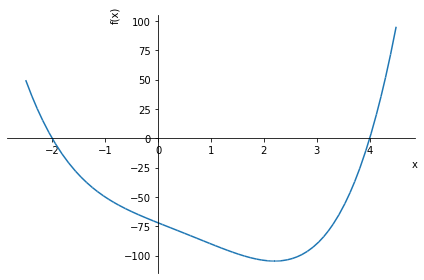

In [6]:
plot(f, (x, -2.5, 4.5))

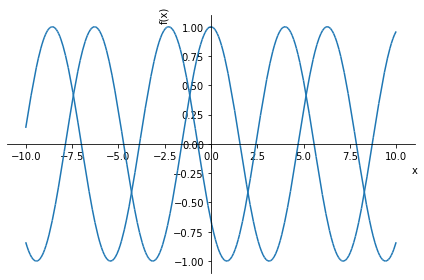

In [7]:
p = plot( cos(x-y).subs(y, 0), cos(x-y).subs(y, 4), (x, -10, 10));

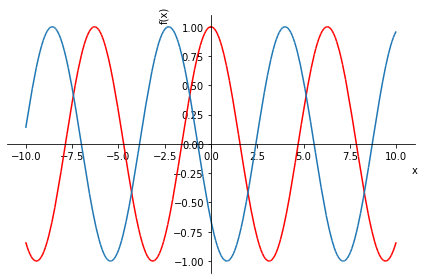

In [8]:
p[0].line_color = 'red'
p.show()

#### Parametric Plots

Parametric plots are created by specifying the value of the coordinates as depending on a paramter:

For example consider the 2D curve given by:  

$$ f(t) = (3*\cos(t/2), \sin(t/2) ) $$



In [ ]:
from sympy.plotting import plot_parametric
from sympy import pi, sqrt
t = sym.symbols('t')

In [ ]:
plot_parametric((sqrt(t) *cos(t/2), sqrt(t)*sin(t/2)), (t, 0, 6*pi))

#### 3D Plots

Likewise 3D plots

In [ ]:
from sympy.plotting import plot3d
from sympy import exp
x, y = sym.symbols('x y')

In [ ]:
plot3d( exp(-(x**2 + y**2)), (x, -2, 2), (y, -2, 2) )

3D plots can easily become hard to visualize and work with. A common solution is to project them into 2D plots. Contour plots for instance, in which we plot level curves are particularly helpful; but not quite implemented yet in sympy.

There is a matplotlib.pyplot method for contour plots.

### Limits

We can find (some) limits:

In [ ]:
x, y = sym.symbols('x y')
sym.limit( sin(x*y)/x, x, 0)

And we even have a symbol that functions as positive infinity: $\infty$

In [ ]:
from sympy import oo
sym.limit( sin(x*y)/x, x, oo )

Only as you can see it is a little hesitant

In [ ]:
sym.limit( (sin(x)/x).subs(y, 1), x, oo)
# The issue seems to be that it is worried that y might be something 
# other than a real number. 

### Derrivatives

We can of course find derrivatives:

In [9]:
from sympy import log

In [11]:
x = sym.symbols('x')
sym.diff( x**3 * log(x), x)

3*x**2*log(x) + x**2

And then this opens all sorts of possibilities:

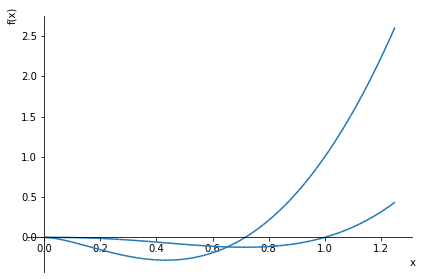

In [13]:
f = x**3 * log(x)
dfdx = sym.diff(f, x)
p = plot(f, dfdx, (x, 0.001, 1.25))

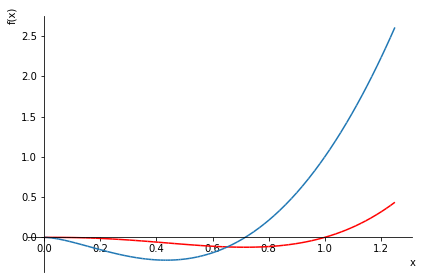

In [14]:
p[0].line_color = 'red'
p.show()

### Integration

And if you have taken Calculus, symbolic integrals are also possible, though as you learned not every function has a closed form anti-derivative:

In [16]:
from sympy import sqrt
f = 1/sqrt(20 - x**2)
sym.integrate(f, x)

asin(sqrt(5)*x/10)

In [ ]:
sym.integrate(f, (x, 0, sqrt(20)) )

## Scipy - Scientific Python

The other package I would like to introduce you to is *scipy* for Scientific Python. This is a collection of computational tools used more generally in the sciences. 

It is huge and we will not have time to see all of it. 

The documentation is here: https://docs.scipy.org/doc/scipy/reference/

Scipy is now the umbrella organization underwhich the development of numpy, sympy, and many other packages is happening.


### Numerical Integration

One of the primary tools in this package that I use are the numerical integrators and ODE solvers. 

For example consider the simple ODE:

$$ \frac{dy}{dx} = \frac{y}{x^2 + 1} $$

You can solve this exactly (it is seperable), but lets see what approximate solutions look like using the scipy solver:

In [17]:
from scipy.integrate import odeint
import numpy as np # most of scipy relies on parts of numpy

Scipy's routines want functions in the traditional Python sense of using a def declaration and returning a float.

In [20]:
def f(x, y):
    return y / (x**2 + 1)

In [19]:
odeint(f, 1, np.arange(0, 5, 0.1), tfirst=True)
# tfirst is a command to tell Python that the independent variable,
# x in our case, comes first in the function declaration.

array([[1.        ],
       [1.10480476],
       [1.21822584],
       [1.33837582],
       [1.46302525],
       [1.58986258],
       [1.71672679],
       [1.84176783],
       [1.96352411],
       [2.08093028],
       [2.19327993],
       [2.30016582],
       [2.40141469],
       [2.49702666],
       [2.58712401],
       [2.67191042],
       [2.7516398 ],
       [2.8265935 ],
       [2.89706407],
       [2.96334413],
       [3.02571892],
       [3.08446161],
       [3.13983056],
       [3.19206802],
       [3.24139958],
       [3.28803443],
       [3.33216582],
       [3.37397195],
       [3.41361682],
       [3.45125127],
       [3.48701394],
       [3.52103221],
       [3.55342316],
       [3.58429457],
       [3.61374563],
       [3.64186746],
       [3.6687441 ],
       [3.69445307],
       [3.71906589],
       [3.74264867],
       [3.76526252],
       [3.78696401],
       [3.80780559],
       [3.82783591],
       [3.84710011],
       [3.86564018],
       [3.88349518],
       [3.900

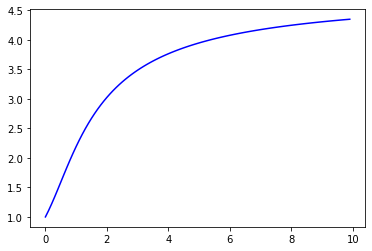

In [21]:
import matplotlib.pyplot as plt
x_in = np.arange(0, 10, 0.1)
y_out = odeint(f, 1, x_in, tfirst=True)
plt.plot(x_in, y_out, 'b-')

## Activity

To explore this package more. Here is an activity for us:

Some laws for electrical circuits:

- (Kirkhoff's Current Law) The sum of the currents into a junction point is zero.
- (Kirkhoff's Voltage Law) The sum of the voltages of a circuit is equal to zero.
- (Ohm's Law) The voltage on a resistor is proportional to the current:  $ E_R = R I$
- The voltage drop across a capacitor is proportional to the electrical charge q of the capacitor: $ E_C = \frac{1}{C} q $

- Considering the charge q of a capacitor, the rate at which the charge changes is the current throught the capacitor (capacitors store or release current as charge $q$):  $$ I = \frac{dq}{dt} $$

###  An RC Circuit

So if we have an RC circuit - a resisitor, a capacitor, and a voltage source in series, we can add up the voltages we get and we find:

$$ V_R + V_C = E = \mbox{the source voltage} $$

and the current of the whole circuit is $I(t)$.

Writing this sum out in terms of the above laws we get:  

$$ R I + \frac{1}{C} q = E $$ 

and then everything on the LHS can be written in terms of $q$ and its rate of change:

$$ R \frac{dq}{dt} + \frac{1}{C} q = E $$

Suppose our resisitor is $R = 1 \mbox{Ohms}$ and the capacitor is $10^{-2} \mbox{Faradays}$, if the applied voltage is a constant $V$ volts, what happens to the circuit for different values of $V$?

#### Step One

Fix a value for $E = V$ and write a function that takes a value for charge $q$ and a time $t$, and returns the value of $\frac{dq}{dt}$. Note that $t$ is not actually used in computing the return value, but it needs to be there for the *odeint* command to work correctly.

Wee need to solve the equation for $\frac{dq}{dt}$

$$ R \frac{dq}{dt} = E - \frac{1}{C}q $$

$$  \frac{dq}{dt} = \frac{E - \frac{1}{C}q}{R} $$

In [24]:
def pink(q, t, C=10**(-2), E=1, R=10):
  return (E - 1/C * q)/R

#### Step Two

Use the odeint function we introduced above, and the matplotlib.pyplot to graph the value of the charge $q$, with an initial value of $q = 2$. 

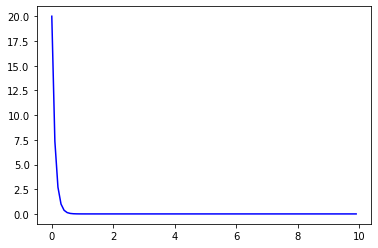

In [26]:
import matplotlib.pyplot as plt
x_in = np.arange(0, 10, 0.1)
y_out = odeint(pink, 20, x_in, tfirst=False)
plt.plot(x_in, y_out, 'b-')

#### Step Three

An annoying thing in how this works is that our function we pass to odeint needs to take just the $t$ and $q$ variables, and nothing else. We would rather be able to change $V$ and produce a new graph so that we could easily move the value of $V$ around. 

Write a function that takes a value for V as an input and produces a graph of the charge $q$ as a function of time.

HINT:  We can define functions inside of our functions!!

### Statistics / Random Variables

Scipy has an extensive collection of random variables with methods defined for the relevant statistical computations. 

For example the normal distribution is imported with

In [ ]:
from scipy.stats import norm

In [ ]:
# Sample from the distribution 
v = norm.rvs(0, 1, size = 50)
v

In [ ]:
plt.hist(v);
# We can plot a histogram from a numpy.array

In [ ]:
# We can evaluate the Cummulative Distribution Function
norm.cdf(-1)

In [ ]:
# We can perform a reverse lookup of the CDF
norm.ppf(0.95)